# Introduction to Data Visualization with Seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
BASE = Path().resolve().parent
DATA = BASE / "datasets"
DATA.exists()

True

In [3]:
for file in DATA.iterdir():
    if file.suffix == '.csv': 
        print(file.relative_to(BASE))

datasets\countries-of-the-world.csv
datasets\housing.csv
datasets\mpg.csv
datasets\netflix_data.csv
datasets\schools.csv
datasets\student-alcohol-consumption.csv
datasets\young-people-survey-responses.csv


In [4]:
students_data = pd.read_csv(DATA.joinpath("student-alcohol-consumption.csv"))
countries_data = pd.read_csv(DATA.joinpath("countries-of-the-world.csv"))
survey_data = pd.read_csv(DATA.joinpath("young-people-survey-responses.csv"))

In [6]:
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [7]:
countries_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 1 Introduction to Seaborn

## 2 Visualizing two quantitative variables

### Relational plots

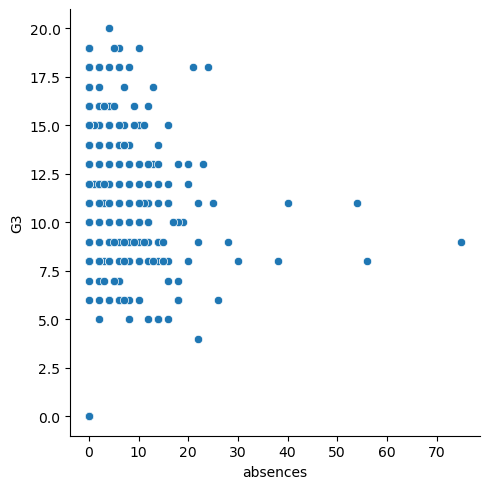

In [11]:
sns.relplot(x="absences", y="G3", 
            data=students_data,
            kind="scatter")

# Show plot
plt.show()

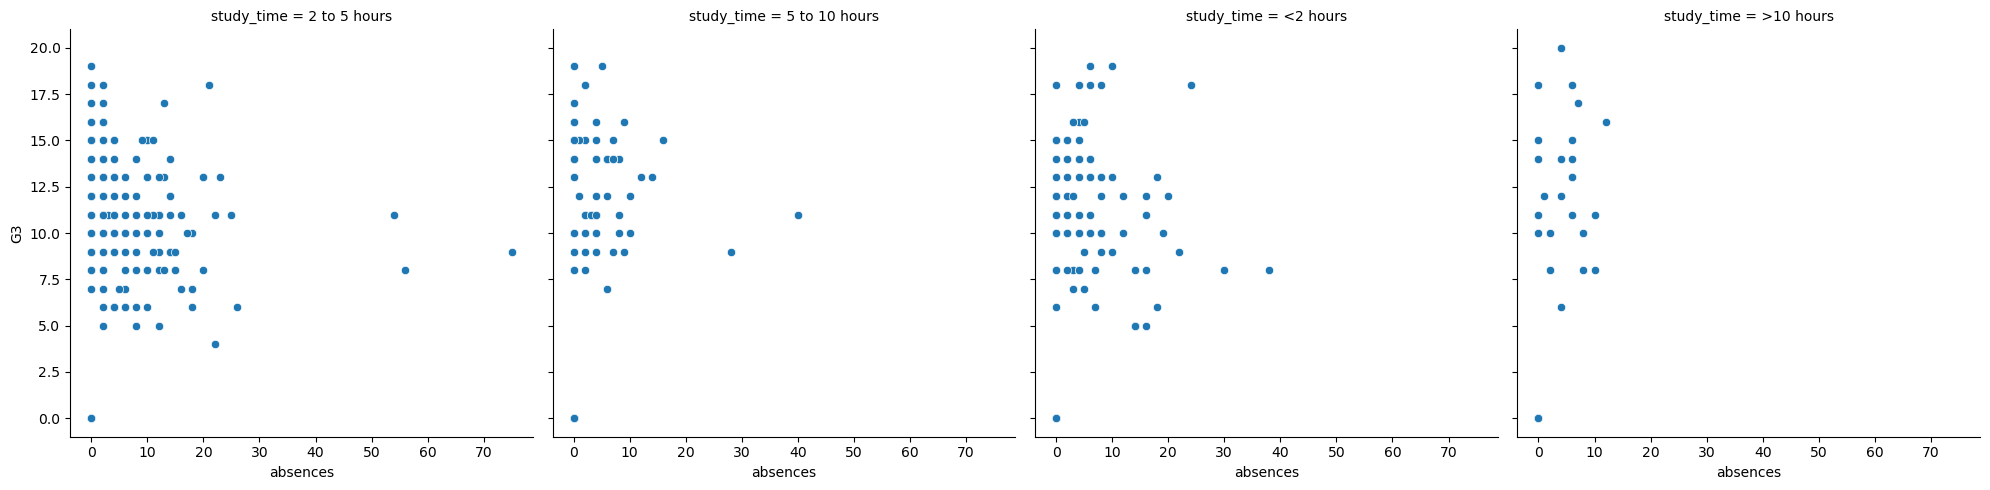

In [12]:
sns.relplot(
    data=students_data, 
    x='absences', 
    y='G3', 
    kind='scatter', 
    col='study_time'
)
plt.show()

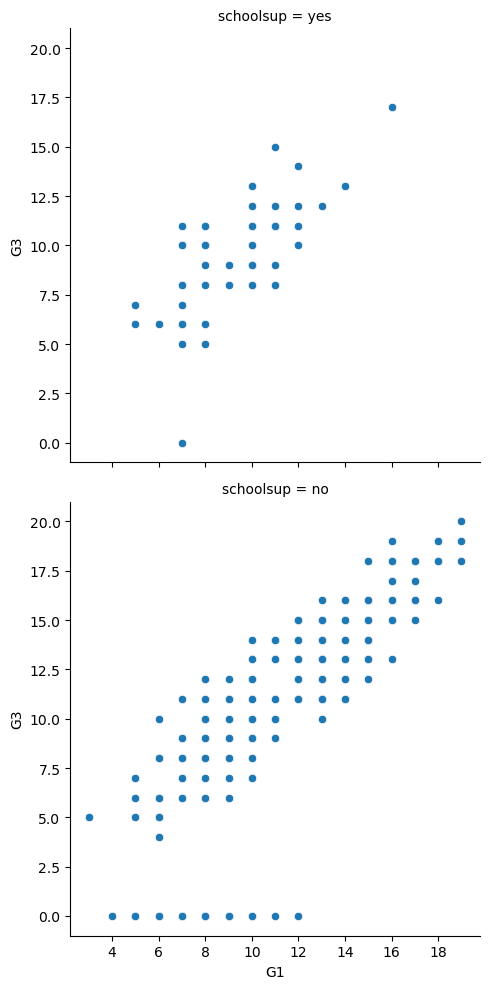

In [13]:
sns.relplot(x="G1", y="G3", 
            data=students_data,
            kind="scatter", 
            row='schoolsup',
            row_order=['yes', 'no']
        )

# Show plot
plt.show()

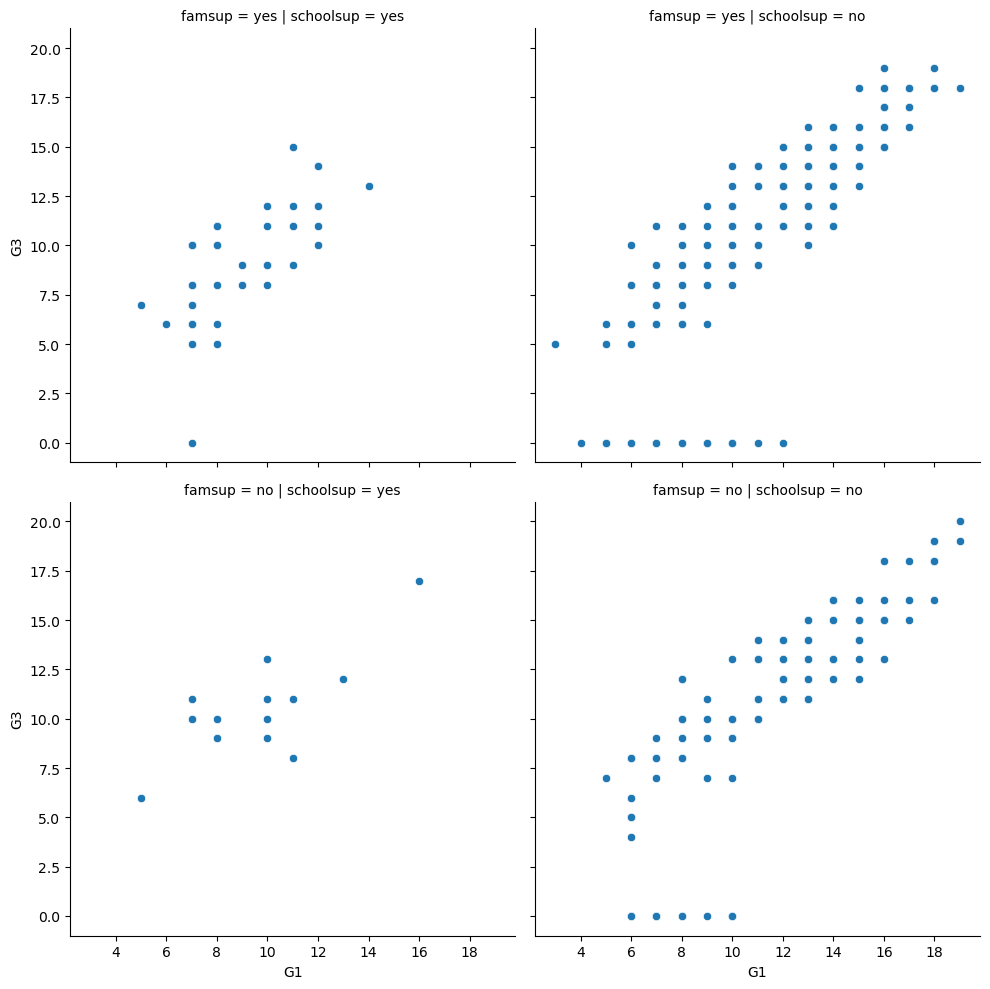

In [14]:
sns.relplot(x="G1", y="G3", 
            data=students_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row='famsup', 
            row_order=["yes", "no"]
        )

# Show plot
plt.show()

### Customizing scatter plots

```Python
sns.relplot(
    data=df, 
    x='col', 
    y='col'
    kind='scatter'|'line', 
    hue='col', 
    style='col', 
    size='col', # quantitative
    alpha=float
)
```

### Introductio to Lineplots

```Python
sns.relplot(
    data=df, x=col, y=col, 
    kind='line', 
    style=col*, 
    hue=col*, 
    markers=True|False, 
    dashes=True|False
)
```

* Multiple observations per x-value
```Python
sns.relplot(
    data...
    kind='line', 
    ci=None|'sd'  # None for not errorbar, default for mean, sd for stdev
)
```



## 3 Visualazing categorical data



* `sns.countplot()` displays the frecuency of each category
```Python
    sns.countplot(
        data=df, x=col, 
    )
```
* `sns.catplot()` used for categorical data plots
```Python
    # countplot
sns.catplot(
    data=df, x=col, 
    kind='count',  # Countplot
    order=category_order_list, 
)

sns.catplot(
        data=df, x=category, y=quantitative 
        kind='bar',  # mean of quantotatove bar per category, displays the mean by default
        order=category_order_list, 
        ci=None, 

)

```


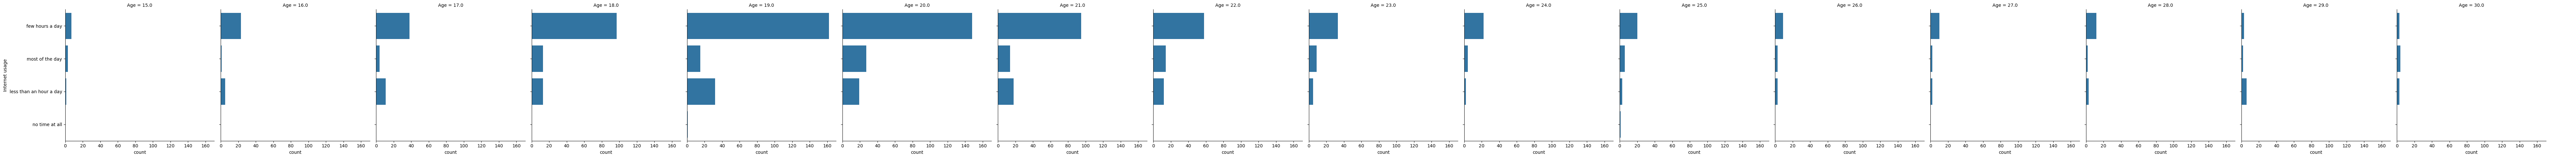

In [29]:
# Separate into column subplots based on age category
sns.catplot(
    y="Internet usage",
    data=survey_data,
    kind="count", 
    col='Age'
)
plt.show()

In [26]:
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

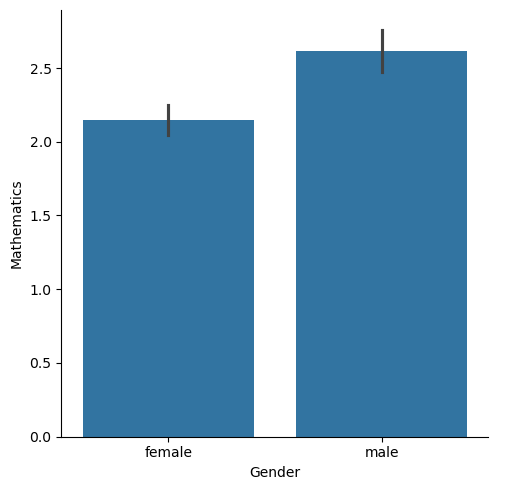

In [28]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(
    data=survey_data, 
    x='Gender', y='Mathematics', 
    kind='bar'
)

# Show plot
plt.show()

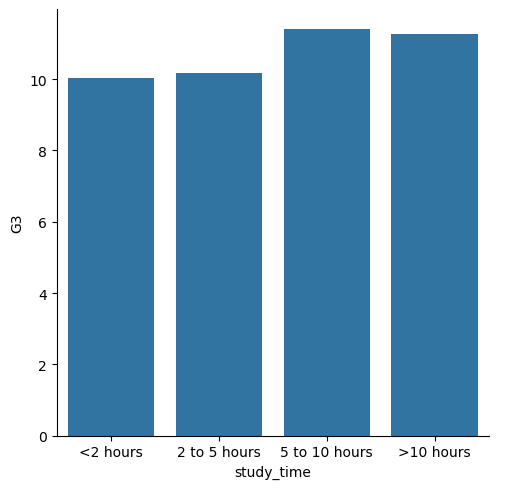

In [ ]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]
                  

# Rearrange the categories
sns.catplot(x="study_time", y="G3",
            data=students_data,
            kind="bar", 
            order=category_order, 
            #ci=None
            errorbar=None
            )

# Show plot
plt.show()

* box plots reprecents the distribution of quantitative data

```Python
sns.catplot(
    kind='box', 
    data=df, 
    x=categorical_col, 
    y=quantitative_col, 
    order=order_list, 
    sym=''  # omit the outliers, 
    whis={
        whis=2.0  # extend to 2.0*IQR, 
        whis=[5, 95]  # show the 5th and 95th percentiles, 
        whis=[0, 100]  # extends whiskers to min and vax values
    }
)
```

In [37]:
sns.set_theme()

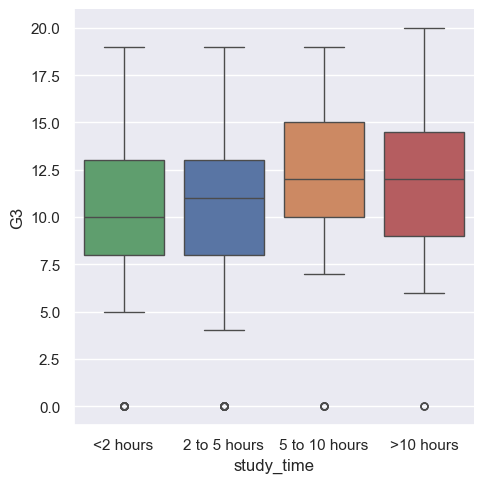

In [40]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(
    kind='box', 
    data=students_data,
    x='study_time', 
    y='G3', 
    order=study_time_order, 
    hue='study_time'
)

# Show plot
plt.show()

In [43]:
students_data.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'location', 'study_time'],
      dtype='object')

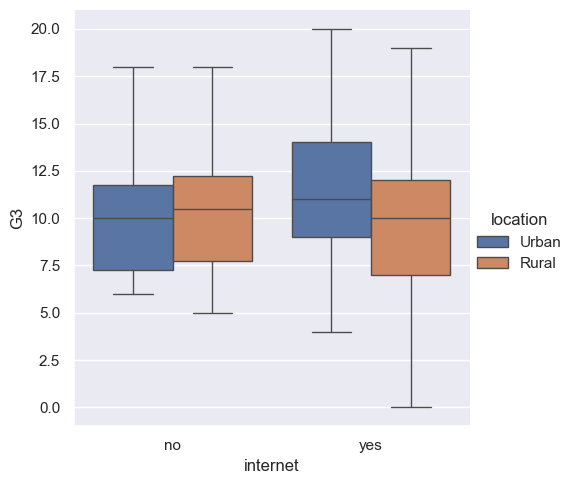

In [46]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(
    kind='box', 
    data=students_data, 
    x='internet', 
    y='G3', 
    hue='location', 
    showfliers=False
)


# Show plot
plt.show()

* *Point plots* shows mean of quantitative variable
    * vertical lines shows `95%` confidence intervals
    * In contrast to line plots, point plots has categorical variable on x-axis


```Python
sns.catplot(
    kind='point', 
    data=df, 
    x=categorical_colm 
    y=numerical_col,
    hue=categorical_col, 
    joing=False, # disconnect the points
    estimator=median,  # set mean to median, 
    capsize=float, # set the size of the confidence interval bar
    ci=None  # off the confidence intervals
)
```

C:\Users\isaul\AppData\Local\Temp\ipykernel_3816\1540651466.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(x="famrel", y="absences",


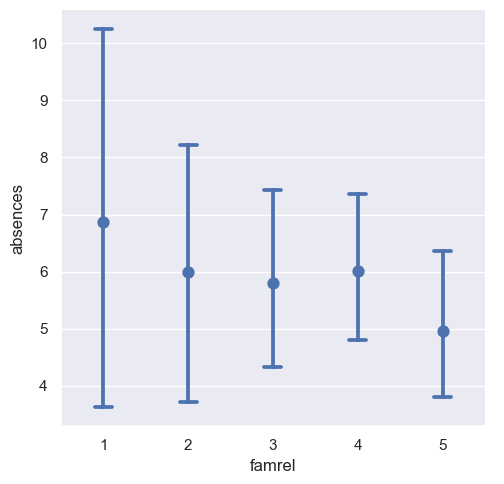

In [48]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=students_data,
            kind="point",
            capsize=0.2, 
            join=False)
            
# Show plot
plt.show()

C:\Users\isaul\AppData\Local\Temp\ipykernel_3816\3646246289.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


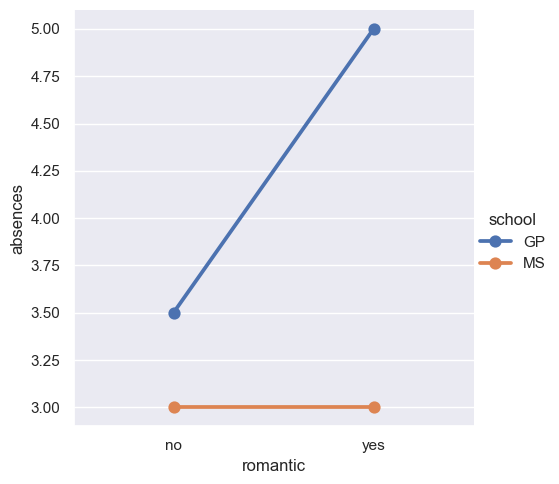

In [49]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(
    x="romantic", y="absences",data=students_data,
    kind="point",
    hue="school",
    ci=None, 
    estimator=median
)

# Show plot
plt.show()

## 4 Customizing Seaborn Plots

### Styles
* Basic `sns` styles: `with`, `dark`, `darkgrid`, `ticks`
* Set the `sns` plot style: `sns.set_style()`
* Set the `pallete` of `sns`: `sns.set_pallete()`
* Seth the `context` os `sns`: `sns.set_context()`
    * `talk` usef for presentations

## Titles and axes labels

* We can see the type of the plot: 
```Python
g = sns.scatterplot(x=col, y=col, data=df)

plot_type = type(g)
```
    * `FacedGrid` -> `relplot()`, `catplot`: create subplots  (multiple axes)
    * `scatterplot()` `countplot()`, etc: creates a **single** plot  (single axes)

* Addin title to `FacetGrid`: `g.fig.suptitle('subtitle, y=1.03)`

* Adding title to `AxesSubplot`: `g.set_title('subtitle, y=1.03)`


```Python
g = sns.catplot(
    x=categorical, 
    y=numerical, 
    kind='some categorical plot', 
    col=categorical
)
g.fig.suptitle(
    'new_title', 
    y=1.03  # chanche position of the main title
)
g.set_titles(
    'This is {col_name}'  # referencing the name of the grouping column
)
g.set(
    xlabel='new X label', 
    ylabel='new Y label'
)
plt.xticks(rotation=90)  # Set the rotation of a the x axis ticks
```

In [51]:
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

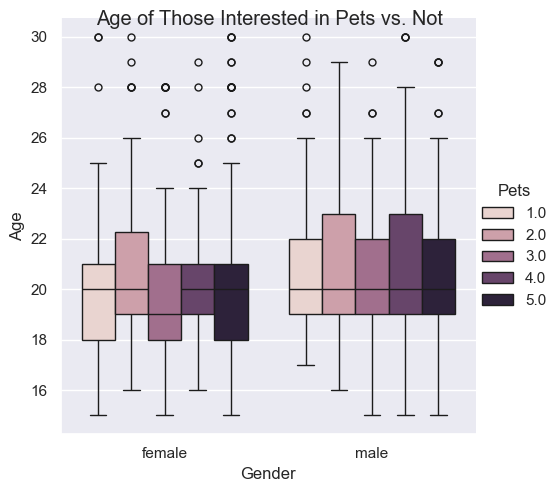

In [52]:
# Set palette to "Blues"
sns.set_palette('Blues')

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle(
    'Age of Those Interested in Pets vs. Not'
)

# Show plot
plt.show()

In [54]:
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')